In [2]:
#import required libraries
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
#load dataset
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Datasets/Boston.csv")

In [4]:
#preprocess the data
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 15)

In [6]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [7]:
data = data.rename(columns = {'medv':'Price'})

In [8]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'Price'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  Price       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [10]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
Price         0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

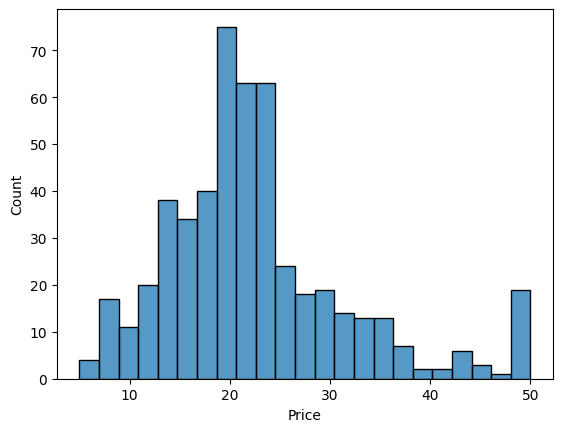

In [14]:
#visualize the Price column
sb.histplot(data['Price'])

<Axes: ylabel='Price'>

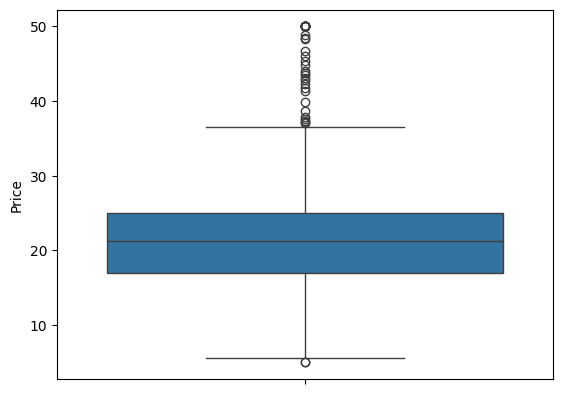

In [15]:
sb.boxplot(data['Price'])

In [20]:
#split the data into independent and dependent
X = data.drop('Price', axis=1)
Y = data['Price']

X.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [23]:
#fit transform the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
#split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print('Training set shape:', X_train.shape, Y_train.shape)
print('Testing set shape:', X_test.shape, Y_test.shape)

Training set shape: (354, 14) (354,)
Testing set shape: (152, 14) (152,)


In [28]:
#define the neural network model structure
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim=14))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1920      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12801 (50.00 KB)
Trainable params: 12801 (50.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [32]:
#compile the model
model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics=['mae'])
X_val = X_train
Y_val = Y_train

In [33]:
#train the model with 20 epochs
model.fit(X_train, Y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 454.0185 - mae: 19.0845 - val_loss: 440.3866 - val_mae: 18.7372
Epoch 2/20
1/1 [==============================] - 0s 42ms/step - loss: 440.3866 - mae: 18.7372 - val_loss: 426.1628 - val_mae: 18.3699
Epoch 3/20
1/1 [==============================] - 0s 40ms/step - loss: 426.1628 - mae: 18.3699 - val_loss: 411.3148 - val_mae: 17.9874
Epoch 4/20
1/1 [==============================] - 0s 40ms/step - loss: 411.3148 - mae: 17.9874 - val_loss: 395.8656 - val_mae: 17.5889
Epoch 5/20
1/1 [==============================] - 0s 41ms/step - loss: 395.8656 - mae: 17.5889 - val_loss: 379.8181 - val_mae: 17.1715
Epoch 6/20
1/1 [==============================] - 0s 57ms/step - loss: 379.8181 - mae: 17.1715 - val_loss: 363.1962 - val_mae: 16.7373
Epoch 7/20
1/1 [==============================] - 0s 58ms/step - loss: 363.1962 - mae: 16.7373 - val_loss: 346.0244 - val_mae: 16.2810
Epoch 8/20
1/1 [==============================] - 0s 40ms

In [36]:
#evaluate the result
result = model.evaluate(X_test, Y_test)

print("Evaluation results:")
print("Loss:", result[0])
print("Mean Absolute Error:", result[1])

Evaluation results:
Loss: 104.19271850585938
Mean Absolute Error: 8.414359092712402
